
# Project2: Understanding and Analysing Movies Trends

Made By: Hind Baageel 

My github page: https://github.com/hindahmad431

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we used a dataset called TMDB 5000 Movie Dataset from Kaggle. This dataset contains almost 5K movies data samples. Each sample is associated with 20 features including movie release date, popularity, vote average and many others. With the help of this dataset, we aim to to answer the following questions: 

<ul>
<li> What are the average, maximum movies budget? movies revenue? vote average? movies runtime?</li>
<li> What are the most common movie language other than english? </li> 
<li> What are the features that are positivaly correlated with revenue In which it can be used to maximize movies revenue.</li>
<li> Are there certain movies keywords associated with higher revenue? </li>
<li> What is the year that movies has achieved the best revenue?</li>
</ul> 


In [180]:
#Importing Importnant Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#setting the style for figures
sns.set_style('darkgrid')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section, the dataset will be loaded and preprocessed. The preprocessing step includes cleaning the dataset and its analyse datatypes. The step is important for us to be able to work with the dataset properly and extract useful insights. 

### General Properties

In [181]:
# Load the Data and Insepcting the first 3 lines and the data shape
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [182]:
#Checking Number of rows and columns in the dataset
df.shape

(4803, 20)

##### This dataset contains 4803 samples with 20 features each. Now let's analyse the datatypes for each feature

In [183]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

##### We can see that the datatypes is mostly correct except release date which needs to be converted to date type.

In [184]:
df['release_date']= pd.to_datetime(df['release_date'])
df.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### Checking Null Values

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

> The column **revenue** looks like it doesn't have any missing values, but when we look at the values from the dataframe, we can see that null values is written as zeros. Thus, we replaced the zero values with the mean revenue.

In [186]:
#replacing zero revenue with the mean revenue.

mean_rev = df['revenue'].mean()

df['revenue'].replace(0, mean_rev, inplace=True)

> Let's check the column with the most missing value: Homepage

In [187]:
df.homepage.isnull().sum()

3091

> from seeing the null values in the homepage title, we can see that 3091 rows out of 4803 doesn't have the home page link. Since that this feature have too many missing values and the movie home page link will not bring any value for predicting movies score, we will drop this column.

In [188]:
#dropping the column 'homepage' from the movies dataframe
df.drop('homepage',axis=1, inplace=True)

df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

> Moreover, we wanted to check the overview column for null values and it shows to have 3 missing values. Since NaN will cause problem later with string processing, we dropped the 3 missing values.

In [189]:
df.overview.isnull().sum()

3

In [190]:
df.dropna(subset=['overview'],inplace=True)
df.overview.isnull().sum()

0

### Checking for duplicates

In [191]:
df.duplicated().sum()

0

> Fortunatly, there is no duplicated values, thus we can move on to the next step. 

### Extracting movie Genres

In [192]:
df.genres.dtypes

dtype('O')

In [193]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

> When we analyse the data stored in Genres column, we can see that it looks like a list of dictionaries but it is stored as string type. Which is why we need to adjust this column to extract only the genres name from this column. 

In [194]:
def extract_genres(input_text):
    
    #this function convert string to list
    text_list = ast.literal_eval(input_text)
    
    #extract the genres name from each element in the list 
    genres_list = [x['name'] for x in text_list]
    
    #join it as one string using |
    final_text = '|'.join(genres_list)
    
    return final_text

In [195]:
df['new_genres'] = df['genres'].apply(extract_genres)

> ##### Great!, now we can use the new genres column to compute the mean for each genres. To divide each genres seperatly while keeping the same index for each row, we will use the explode function. The explode() function is used to transform each element of a list-like to a row, replicating the index values <a href="#ref1">[1]</a>. 

In [210]:
#Explode the genres column, the new column
new_df = df.assign(final_genres=df['new_genres'].str.split('|')).explode('final_genres')
new_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,new_genres,release_year,final_genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,2009.0,Action
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,2009.0,Adventure
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,2009.0,Fantasy


<a id='eda'></a>
## Exploratory Data Analysis

> After the preprocessing step, this section will cover the data exploration. In this section, we aim to answer the research question using stastical and data visualization tools. 

### Research Question 1: What are the average, maximum movies budget? movies revenue? vote average? movies runtime? 

In [197]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.905988e+07,56967.252917,21.505403,1.067160e+08,106.880833,6.092917,690.645208
std,4.073043e+07,88350.548128,31.822273,1.546890e+08,22.611663,1.191468,1234.853376
min,0.000000e+00,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,7.950000e+05,9012.750000,4.682212,2.758125e+07,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,8.226064e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [198]:
df[df['revenue'] == df['revenue'].max()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,new_genres
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction


from looking at the general statstics on the dataset, we can see that the average movies budget falls around twenty nine million. On the other side, the maximum movie budget was three billion eight hundred million. Secondly, we can see that the average vote score was 6. Thirdly, we can see that the mean revenue falls around one billion sixty seven million dollars and the maximum movie revenue was twenty seven billion, eight hundred seventy nine million. That movie with the highest profit was **Avatar**. 

Text(0, 0.5, 'Time in Minutes')

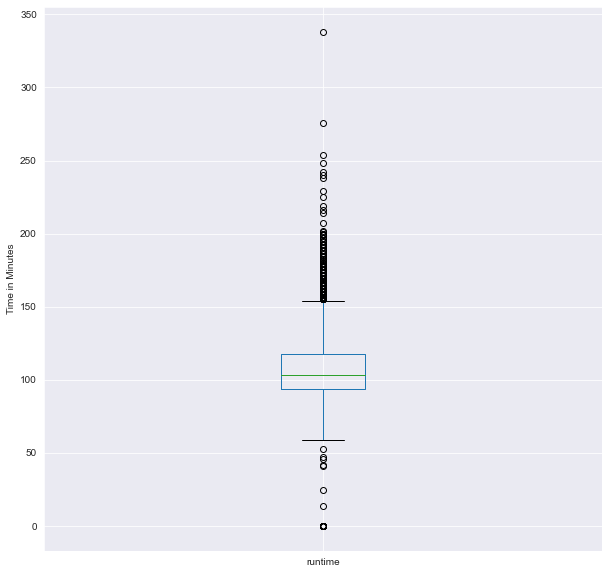

In [199]:
df['runtime'].plot(kind='box', figsize=(10,10))

plt.ylabel('Time in Minutes', fontsize=10)

> ##### from observing the runtime box plot, we can see that movies have an average runtime of 120 minutes. However, there some outliers where the movies can be too short < 50 minutes or run for longer than 2 hours. 

### Research Question 2: What are the most common movie language other than english? 

Text(0.5, 0, 'Movie Language')

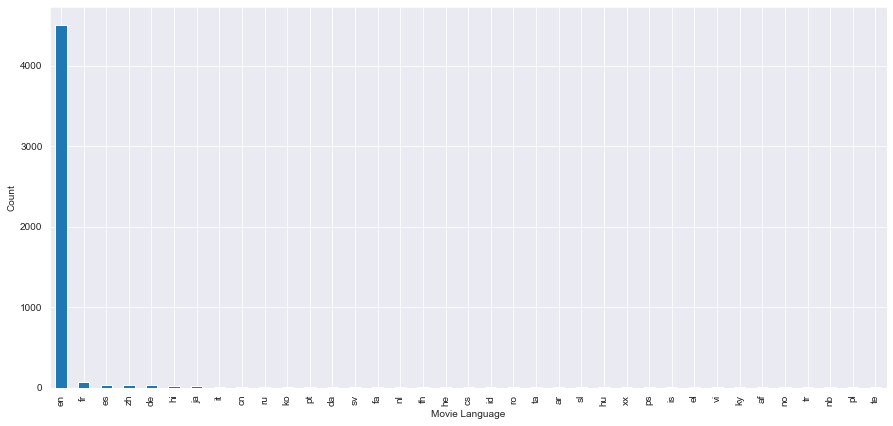

In [200]:
df.original_language.value_counts().plot(kind='bar', figsize=(15,7))

plt.ylabel('Count', fontsize=10)
plt.xlabel('Movie Language', fontsize=10)

> ##### We can see from the above diagram that english is the most common english language followed by french and Spanish.  

### Research Question 3: What are the features that are positivaly correlated with revenue In which it can be used to maximize movies revenue.

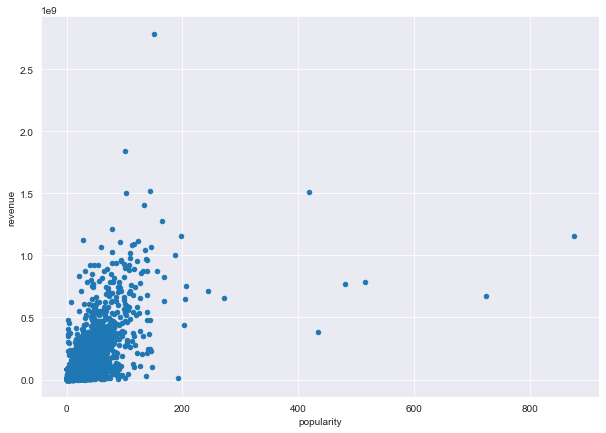

In [201]:
df.plot(x= 'popularity', y='revenue', kind='scatter', figsize=(10,7))

> ##### We can see that movies popularity is positivaly correlated with revnue. meaning if we increase the popularity of a movie through advertisment, the the movie will more likely recieve a better revenue.

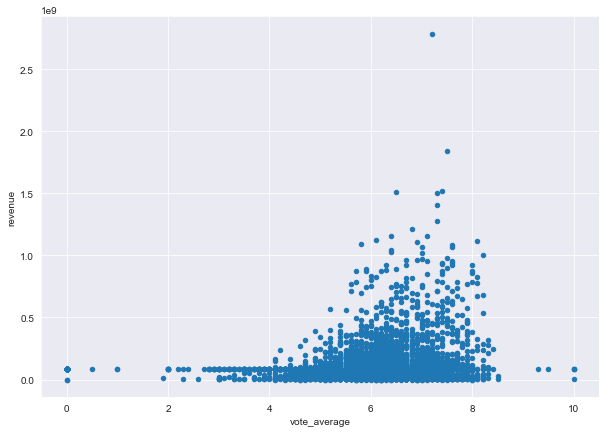

In [202]:
df.plot(x='vote_average', y='revenue', kind='scatter', figsize=(10,7))

> ##### We can see that movies that have recieved a voting average between 5 and 8 have recieved better revenues than the others. but we can't say that voting average is positivaly correlated with revenue. since that samples above 8 voting average haven't showed a signficant increase in revenue.

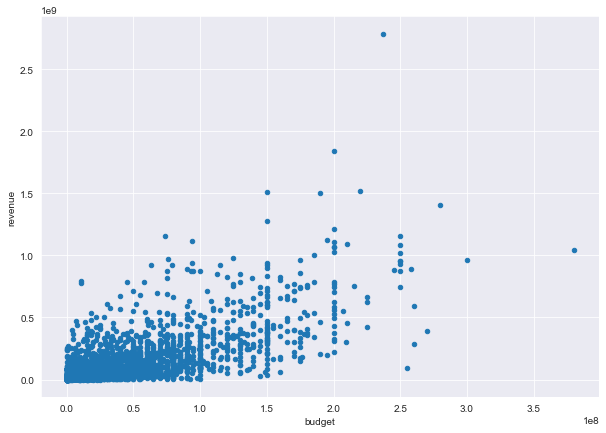

In [203]:
df.plot(x='budget', y='revenue', kind='scatter', figsize=(10,7))

> #### We can see that budget is positivaly correlated with revnue. which means movies with higher initial budget might recieve better revenue. 

### Research Question 4: Are there certain movies keywords associated with higher revenue?

Text(0.5, 1.0, 'Measuring most common movies genres')

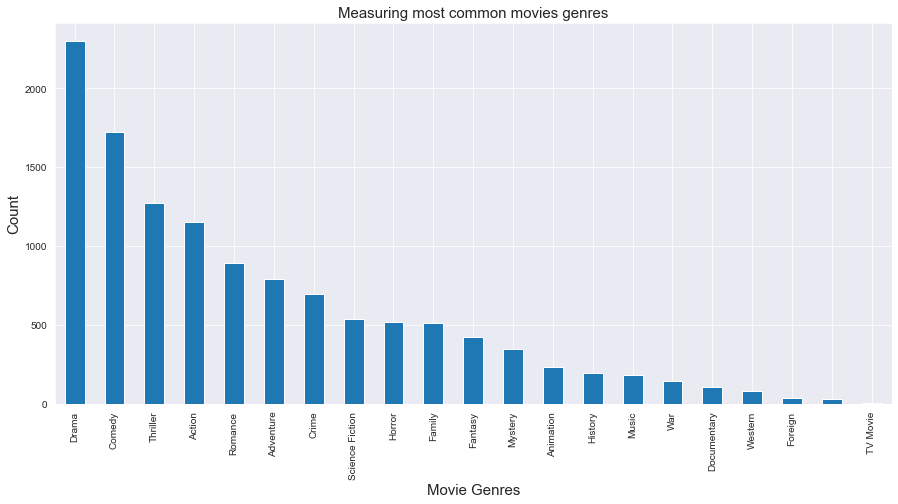

In [204]:
new_df.final_genres.value_counts().plot(kind='bar', figsize=(15,7))

plt.xlabel('Movie Genres',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Measuring most common movies genres', fontsize=15)

> ##### We can see that drama followed by comedy movie is the most common movies genres. But does that mean they are more profitable?

To understand the correlation between differenet genres and revenue, we computed the mean according to each genres then we plotted it using horizontal bar chart

Text(0.5, 1.0, 'Measuring most profitable movies genres')

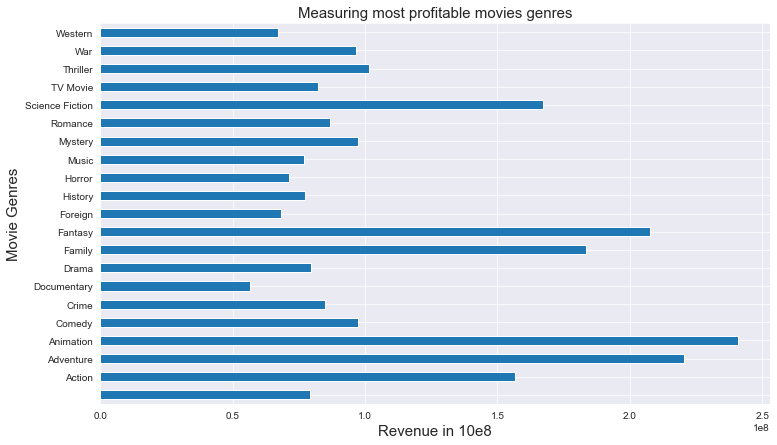

In [205]:
plt.figure(figsize=(12,7))

new_df.groupby('final_genres').mean()['revenue'].plot(kind='barh')

plt.xlabel('Revenue in 10e8',fontsize=15)
plt.ylabel('Movie Genres', fontsize=15)
plt.title('Measuring most profitable movies genres', fontsize=15)

> ##### from seeing the above figure, we can say that animated movies has the highest revenue followed by adventure movies. Keywords such as (animation, adventure, family and fantacy were associated with higher averege revenue. 

### Research Question 5: What is the year that movies has achieved the best revenue?

To answer this question, we started by creating a new column that contain only the release date so that we can compute the average revenue for each year. 

In [206]:
df['release_year'] = df['release_date'].dt.year

([<matplotlib.axis.XTick at 0x1110676ca08>,
 <a list of 22 Text major ticklabel objects>)

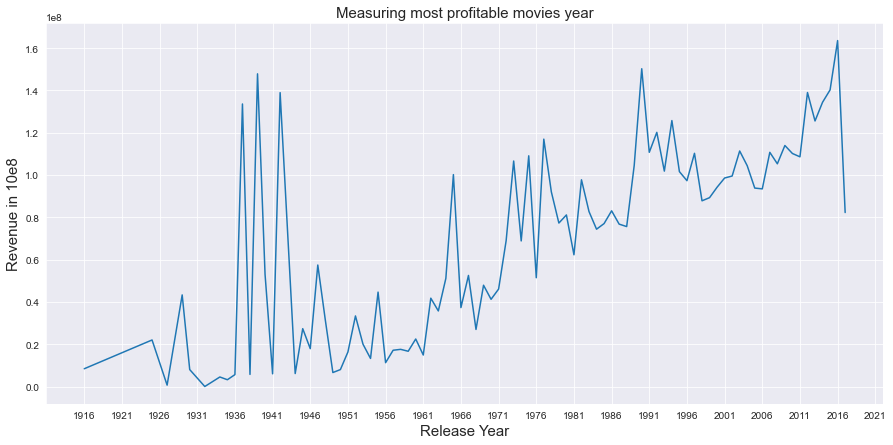

In [207]:

#setting the minimum and maximum xticks
min_year = df['release_year'].min()
max_year = df['release_year'].max()

#plotting the figure 
plt.figure(figsize=(15,7))
df.groupby('release_year').mean()['revenue'].plot(kind='line')

plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Revenue in 10e8', fontsize=15)
plt.title('Measuring most profitable movies year', fontsize=15)
plt.xticks(np.arange(min_year, max_year+5, 5))


> ##### from the figure, we can see that 2016 was the higher year of revnues in movies follwed by 1988. from the curve of the line we can see that the revenue is increasing by years. But, we observe that 2017 has witnessed a huge drop in revenue. 

### Research Question 6: what are the most common words on movies overview? 

to answer this question, we used wordcloud. Wordcloud is used to represent the frequency or the importance of a word in a text. words with higher frequency or importance shows bigger than the others. 
the implmented code was taken from <a href="#ref2">[2]</a> but was modified to serve the purpose of this project. 

In [208]:
text = " ".join(overview for overview in df.overview)

print ("There are {} words in the combination of all overviews.".format(len(text)))

There are 1470713 words in the combination of all overviews.


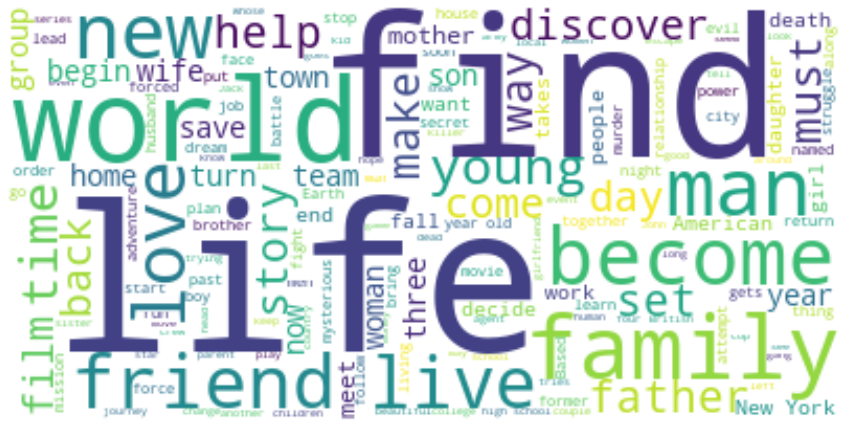

In [209]:
# Create stopword list(words that we don't want to show up in the wordcloud):
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "first", "take", "will"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image using matplotlib:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> #### from looking to the wordcloud, we can see that words such as life, world, find, family, love, friend and story usually appears in movies review. 

<a id='conclusions'></a>
## Conclusions

#### The insights gained from the exploration of movies dataset were very intersting. 
from looking at the general statstics on the dataset, we can see that the average movies budget falls around twenty nine million. On the other side, the maximum movie budget was three billion eight hundred million. Secondly, we can see that the average vote score was 6. Thirdly, we can see that the mean revenue falls around one billion sixty seven million dollars and the maximum movie revenue was twenty seven billion, eight hundred seventy nine million. That movie with the highest profit was **Avatar**. 

1- I was found that the average movie budget is around twenty nine million. Moreover, it was found that the average vote score is 6. lastly, the average revenue was found to be around 1 billion. The movie with the best revenue was found to be Avatar. 

2- It was found that the average movies run time falls around 120 minute. but there was some outlier that have reached 50 minutes or 3 hours long.

3- I t was found that the most common movie language after english is France and Spanish. \

4- It was found that popularity and budget were positivaly correlated with revenue. Thus, these two features can be used to predict the revenue of movie. 

5- It was found that keywords such fantacy, adventure, family and animation are associated with better revenue. 

6- It was found that 2016 was the most profitable years in movies industry.

7- words such as family, life, world, story, find usually appears in movies overviews. 

## Limitation
One of the limitation of this experiment is that lot of revenue data is missing in the given dataset. Since we treated the revenue variable is our main dependent variable, the results might varies if we have increase the number with actual revnue values, not the mean value. 

# References

<a id='ref1'></a> [1] w3resource, 2020 https://www.w3resource.com/pandas/dataframe/dataframe-explode.php

<a id='ref2'></a> [2] Duong Vu, 2019, https://www.datacamp.com/community/tutorials/wordcloud-python
